In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("kmeans(Mall_Customers).csv")
print(df)
df.info()

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


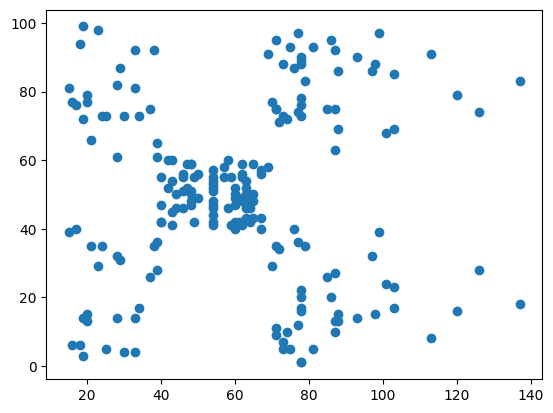

In [3]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [4]:
# Elbow Method
wcss = []
k_range = range(1,11)
for i in k_range:
    kmean = KMeans(n_clusters = i)
    kmean.fit(df)
    wcss.append(kmean.inertia_)

c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

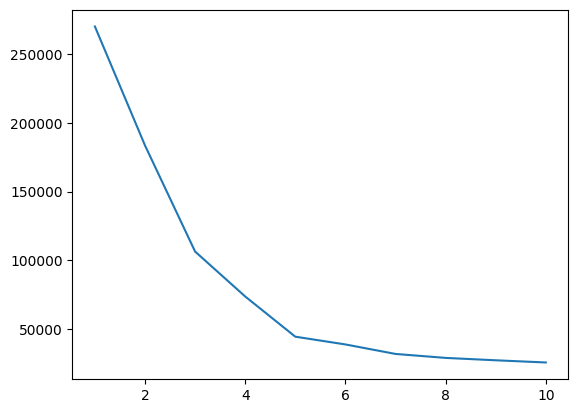

In [5]:
plt.plot(k_range,wcss)

In [6]:
kmean = KMeans(n_clusters = 5)
kmean.fit(df)

KMeans(n_clusters=5)

In [7]:
df["clusters"] = kmean.labels_

In [8]:
df

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,4
196,126,28,0
197,126,74,4
198,137,18,0


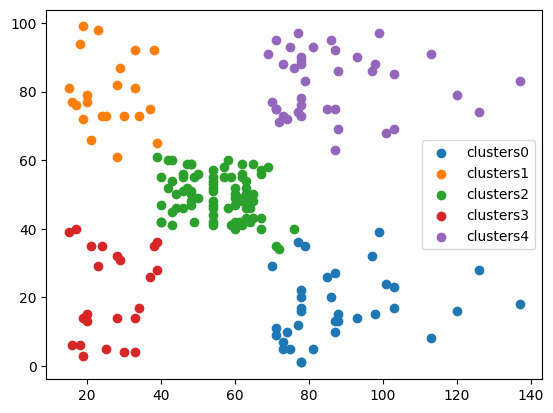

In [13]:
for i in range(5):
    plt.scatter(
        df.loc[df["clusters"]==i,"Annual Income (k$)"],
        df.loc[df["clusters"]==i,"Spending Score (1-100)"],
        label = f"clusters{i}"
    )
plt.legend()